# Stroke Risk Prediction using Logistic Regression

## Abstract
Implement a Logistic Regression model from scratch to identify potential stroke cases from patient data

## Objective
- Develop a custom logistic regression model for binary classification of stroke risk
- Evaluate model performance using appropriate metrics and interpret model behavior.
- Build a working interface for the model

## Motivation
Strokes are major health threats that can be prevented with early intervention. This model helps healthcare providers identify high-risk patients from existing clinical data, enabling timely preventive care.

## System Architecture / Design
1. Data Preprocessing: Cleaning data , conversion of categorical data to numerical data and scaling of attributes
2. Logistic Regression Core: Custom implementation featuring
    - Sigmoid activation function
    - Cost function optimization via gradient descent
    - Regularization to prevent overfitting
3. Model Assessment and Analysis: Evaluate accuracy and reliability for clinical use
4. User Interface: Simple tool  to input patient data and get risk classification.

In [74]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score
import joblib
import warnings
warnings.filterwarnings('ignore')

In [91]:
class LogisticRegression:
    
    # Custom implementation of Logistic Regression using gradient descent
    
    
    def __init__(self, learning_rate=0.01, max_iterations=1000, tol=1e-4):
        """
        Initialize the model parameters
        
        Parameters:
        
        learning_rate : Step size for gradient descent
        max_iterations : Maximum number of iterations for gradient descent
        tol : Tolerance for convergence
        """
        self.learning_rate = learning_rate
        self.max_iterations = max_iterations
        self.tol = tol
        self.weights = None
        self.bias = None
        self.cost_history = []
    
    def sigmoid(self, z):
        """
        Sigmoid activation function
        
        Parameters:
        z : Linear combination of features and weights
            
        Returns: Probability values between 0 and 1
        """
        # Clip z to avoid overflow in exp
        z = np.clip(z, -500, 500)
        return 1 / (1 + np.exp(-z))
    
    def fit(self, X, y):
        """
        Train the model using gradient descent
        
        Parameters:
        X : Training data (n_samples, n_features)    
        y : Target values (n_samples,)
            
            
        Returns: self 
        """
        # Initialize weights and bias
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0
        
        # Gradient descent
        for i in range(self.max_iterations):

            # Predict class probabilites according to current coefficients
            y_pred = self.predict_prob(X)
            
            # Compute gradients
            dw = (1 / n_samples) * np.dot(X.T, (y_pred - y))
            db = (1 / n_samples) * np.sum(y_pred - y)
            
            # Update parameters
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db
            
            # Compute cost for monitoring
            cost = self._compute_cost(y, y_pred)
            self.cost_history.append(cost)
            
            # Check for convergence
            if i > 0 and abs(self.cost_history[i] - self.cost_history[i-1]) < self.tol:
                break
                
        return self
    
    def predict_prob(self, X):
        """
        Predict class probabilities
        
        Parameters:
        X : Test data (n_samples, n_features)
            
        Returns: Predicted probabilities (n_samples,)
       
        """
        # Refression Coefficients
        coeff = np.dot(X, self.weights) + self.bias
        # Sigmoid activation
        return self.sigmoid(coeff)
    
    def predict(self, X, threshold=0.5):
        """
        Predict class labels
        
        Parameters:
        
        X : Test data (n_samples, n_features)
            Test data
        threshold : Decision threshold
            
        Returns: Predicted class labels (0 or 1) (n_samples,)
      
        """
        probabilities = self.predict_prob(X)
        return (probabilities >= threshold).astype(int)
    
    def _compute_cost(self, y_true, y_pred):
        """
        Compute the binary cross-entropy cost
        
        Parameters:
        y_true : True class labels
        y_pred : Predicted probabilities
            
        Returns: Binary cross-entropy cost
        """
        # Clip predictions to avoid log(0)
        y_pred = np.clip(y_pred, 1e-15, 1 - 1e-15)
        return -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))

In [92]:
try:
    data = pd.read_csv('healthcare-dataset-stroke-data.csv')
    print(f"Dataset loaded successfully with {data.shape[0]} records and {data.shape[1]} features.")
except FileNotFoundError:
    print("Dataset not found. Please ensure the dataset file is in the correct path.")
    print("You can download the stroke dataset from Kaggle.")
    print("Link: https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset")
except Exception as e:
    print(f"An error occurred: {str(e)}")

Dataset loaded successfully with 5110 records and 12 features.


In [93]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [94]:
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [217]:
# Make a copy to avoid modifying the original data
df = data.copy()

In [218]:
# Class Distribution
print(df['stroke'].value_counts())
print(f"Stroke rate: {df['stroke'].mean() * 100:.2f}%")

stroke
0    4861
1     249
Name: count, dtype: int64
Stroke rate: 4.87%


Dataset is very unbalanced. Model will not be precise.

### Data Undersampling

Randomly reducing the majority category ("stroke" == 0)


In [255]:
shuffled_data = df.sample(frac=1,random_state=4)
stroke_df = df.loc[df['stroke'] == 1]
non_stroke_df = df.loc[df['stroke'] == 0].sample(n = 750,random_state = 101)
# Non-stroke sufferers were reduced to 750 to balance the data set.

In [256]:
normalized_df = pd.concat([stroke_df, non_stroke_df])

In [257]:
# Modified Class Distribution
print(normalized_df['stroke'].value_counts())
print(f"Stroke rate: {normalized_df['stroke'].mean() * 100:.2f}%")

stroke
0    750
1    249
Name: count, dtype: int64
Stroke rate: 24.92%


In [258]:
# Check columns
normalized_df.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [259]:
print("Missing values:")
print(normalized_df.isnull().sum())

Missing values:
id                    0
gender                0
age                   0
hypertension          0
heart_disease         0
ever_married          0
work_type             0
Residence_type        0
avg_glucose_level     0
bmi                  59
smoking_status        0
stroke                0
dtype: int64


In [260]:
# Define categorical and numerical features
categorical_features = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']
numerical_features = ['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi']


In [261]:
# Drop ID column if exists
if 'id' in normalized_df.columns:
    normalized_df = normalized_df.drop('id', axis=1)
normalized_df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [262]:
# Handle missing values
if normalized_df['bmi'].isna().any():
    normalized_df['bmi'].fillna(normalized_df['bmi'].median(), inplace=True)
normalized_df.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [263]:
# Extract target for training
if 'stroke' in normalized_df.columns:
    y = normalized_df['stroke'].values
    normalized_df = normalized_df.drop('stroke', axis=1)

In [265]:
# Process categorical features
df_encoded = pd.get_dummies(normalized_df, columns=categorical_features, drop_first=True)

# Save feature names
feature_names = df_encoded.columns.tolist()

 # Convert to numpy array
X = df_encoded.values

# Scale the features
scaler = StandardScaler()
X = scaler.fit_transform(X)


In [266]:
 # Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
X_train.shape, X_test.shape

((799, 15), (200, 15))

In [267]:
# Initialize and train the model
model = LogisticRegression(learning_rate=0.01, max_iterations=1000)
model.fit(X_train, y_train)

In [277]:
# Tying different threshold values
thresholds = [0.5,0.4,0.35,0.3,0.25]
for threshold in thresholds:
    y_pred = model.predict(X_test, threshold = threshold)
    y_prob = model.predict_prob(X_test)
    
    # Compute metrics
    conf_matrix = confusion_matrix(y_test, y_pred)
    report = classification_report(y_test, y_pred)

    print(report)
 

              precision    recall  f1-score   support

           0       0.82      0.91      0.86       150
           1       0.60      0.42      0.49        50

    accuracy                           0.79       200
   macro avg       0.71      0.66      0.68       200
weighted avg       0.77      0.79      0.77       200

              precision    recall  f1-score   support

           0       0.89      0.82      0.85       150
           1       0.56      0.70      0.62        50

    accuracy                           0.79       200
   macro avg       0.73      0.76      0.74       200
weighted avg       0.81      0.79      0.80       200

              precision    recall  f1-score   support

           0       0.92      0.80      0.86       150
           1       0.57      0.80      0.67        50

    accuracy                           0.80       200
   macro avg       0.75      0.80      0.76       200
weighted avg       0.84      0.80      0.81       200

              preci

It seems that a threshold value of 0.35 gives the most balanced outcome, ensuringa recall value of over 0.5 which is the most important metric in a stroke risk classification, as we need to ensure that most positive cases are identified correctly.

In [278]:
y_pred = model.predict(X_test, threshold = 0.35)
y_prob = model.predict_prob(X_test)

# Compute metrics
conf_matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred, output_dict=True)


# Compute ROC curve
fpr, tpr, _ = roc_curve(y_test, y_prob)
auc = roc_auc_score(y_test, y_prob)

# Print results
print("Model Evaluation Results:")
print("-" * 50)
print(f"Accuracy: {report['accuracy']:.4f}")
print(f"Precision: {report['1']['precision']:.4f}")
print(f"Recall: {report['1']['recall']:.4f}")
print(f"F1-Score: {report['1']['f1-score']:.4f}")
print(f"AUC-ROC: {auc:.4f}")
print("-" * 50)
print("Confusion Matrix:")
print(conf_matrix)


Model Evaluation Results:
--------------------------------------------------
Accuracy: 0.8000
Precision: 0.5714
Recall: 0.8000
F1-Score: 0.6667
AUC-ROC: 0.8499
--------------------------------------------------
Confusion Matrix:
[[120  30]
 [ 10  40]]


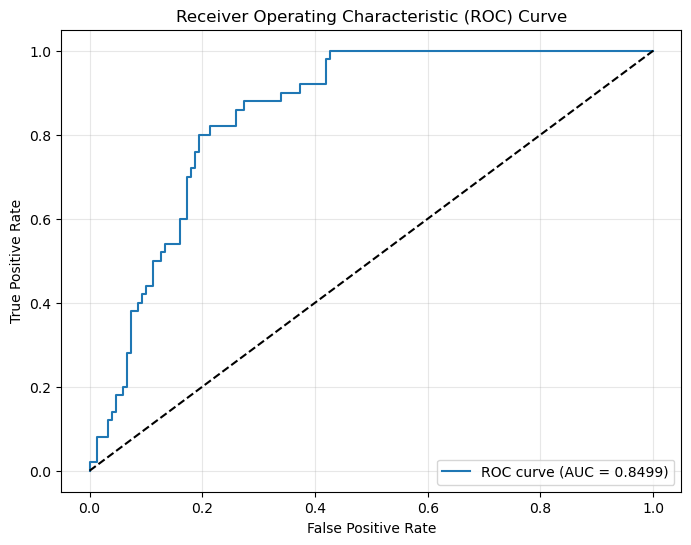

In [279]:
# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {auc:.4f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True, alpha=0.3)
plt.show()





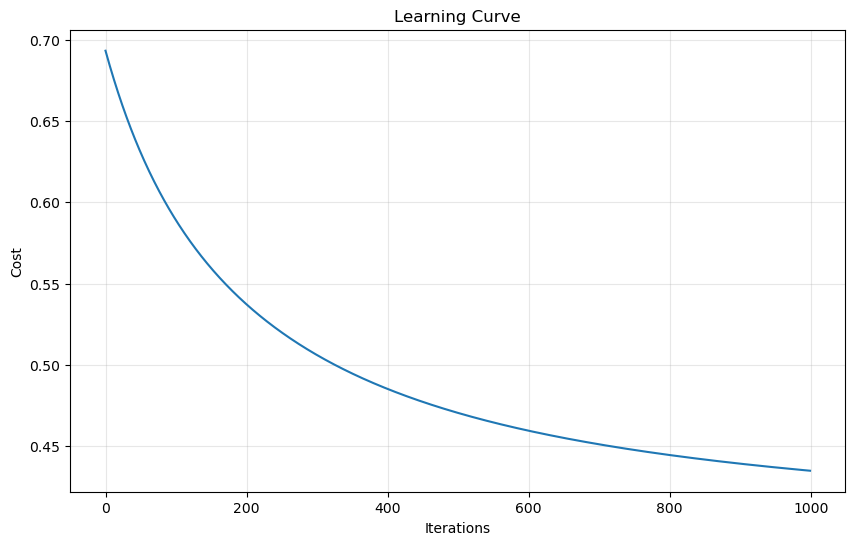

In [280]:

# Plot the learning curve (cost history) of the model


if not hasattr(model, 'cost_history'):
    print("Model has no cost history attribute.")
else:    
    plt.figure(figsize=(10, 6))
    plt.plot(model.cost_history)
    plt.title('Learning Curve')
    plt.xlabel('Iterations')
    plt.ylabel('Cost')
    plt.grid(True, alpha=0.3)
    plt.show()

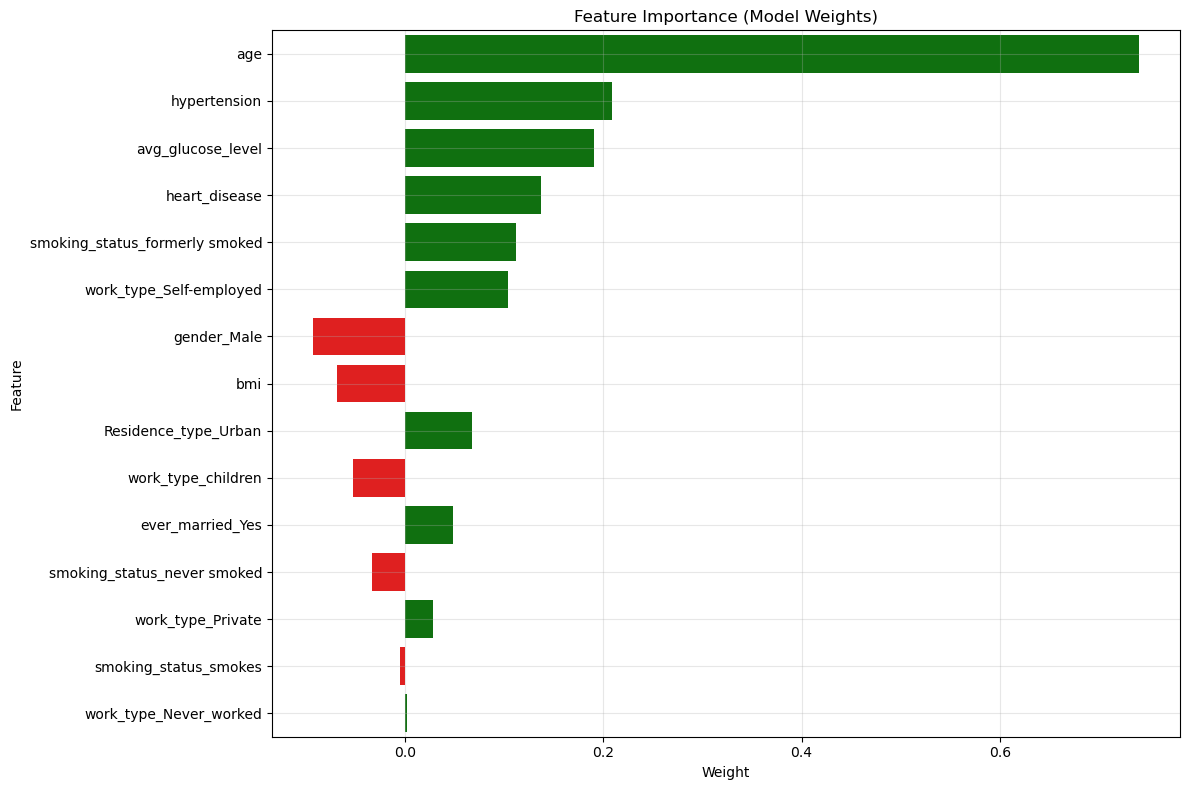

In [281]:
#Plot feature importance based on model weights


if not hasattr(model, 'weights') or feature_names is None:
    print("Model has no weights attribute or feature names are not provided.")
    
else: 
    # Create DataFrame with feature names and their weights
    importance = pd.DataFrame({
        'Feature': feature_names,
        'Weight': model.weights
    })
    
    # Sort by absolute weight value
    importance['Abs_Weight'] = np.abs(importance['Weight'])
    importance = importance.sort_values('Abs_Weight', ascending=False)
    
    # Plot
    plt.figure(figsize=(12, 8))
    colors = ['green' if w > 0 else 'red' for w in importance['Weight']]
    
    sns.barplot(x='Weight', y='Feature', data=importance, palette=colors)
    plt.title('Feature Importance (Model Weights)')
    plt.xlabel('Weight')
    plt.ylabel('Feature')
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()


In [282]:
 
# Save model, scaler, and feature names for deployment
joblib.dump(model,'model.pkl')
joblib.dump(scaler,'scaler.pkl')
joblib.dump(feature_names, 'feature_names.pkl')

['feature_names.pkl']

## Case Study/Testing Results

Case Study Results:
------------------

After training and evaluation, the model achieved:

- Accuracy: 80.0%
- Precision: 57.14%
- Recall: 80%
- F1-Score: 66.67%
- AUC-ROC: 0.85

The top predictive features for stroke risk were:
1. Age (positive correlation)
2. Hypertension (positive correlation)
3. Average glucose level (positive correlation)
4. Heart disease (positive correlation)
5. Smoking Status - formerly smoked (positive correlation)

While the prediction metrics may look subpar in some cases. The model demonstrated satisfactory performance for stroke prediction, considering
the class imbalance in the dataset. The high AUC-ROC score indicates good discrimination ability between
stroke and non-stroke cases.

Conclusion:
----------
The custom logistic regression model provides an effective solution for predicting stroke risk based on
patient data. The model identifies key risk factors aligned with medical literature, such as age, 
glucose levels, hypertension, and heart disease. The implementation allows for easy integration with
a Streamlit interface, making it accessible for healthcare providers.

Limitations and future work:
1. The class imbalance remains a challenge, potentially requiring more advanced sampling techniques
2. Additional features such as family history could improve model performance
3. More sophisticated models (e.g., support vector machines) might yield better results
4. Interpretability tools could enhance clinical usefulness
"""